# 08. Simulating from Some Discrete and Continuous Random Variables

## Marta Braojos

# The Standard $Cauchy$ Random Variable

A standard $Cauchy$ Random Variable has the following PDF $f$ and DF $F$:

$$
f(x) =\frac{1}{\pi(1+x^2)}\text{,}\,\, -\infty < x < \infty
$$

$$
F(x) = \frac{1}{\pi}\tan^{-1}(x) + 0.5
$$

 

The $Cauchy$ distribution is an interesting distribution because the expectation does not exist:

$$
\int \left|x\right|\,dF(x) = \frac{2}{\pi} \int_0^{\infty} \frac{x}{1+x^2}\,dx = \left(x \tan^{-1}(x) \right]_0^{\infty} - \int_0^{\infty} \tan^{-1}(x)\, dx = \infty \ .
$$



In [2]:
from pylab import cumsum

#Defining the functions I need for later

def uniformFInverse(u, theta1, theta2):
    '''A function to evaluate the inverse CDF of a uniform(theta1, theta2) distribution.
    
    u, u should be 0 <= u <= 1, is the value to evaluate the inverse CDF at.
    theta1, theta2, theta2 > theta1, are the uniform distribution parameters.'''
    
    return theta1 + (theta2 - theta1)*u


def uniformSample(n, theta1, theta2):
    '''A function to simulate samples from a uniform distribution.
    
    n > 0 is the number of samples to simulate.
    theta1, theta2 (theta2 > theta1) are the uniform distribution parameters.'''
    
    us = [random() for i in range(n)]
    
    return [uniformFInverse(u, theta1, theta2) for u in us]



def cauchyFInverse(u):
    '''A function to evaluate the inverse CDF of a standard Cauchy distribution.
    
    u is the value to evaluate the inverse CDF at.'''
    
    return RR(tan(pi*(u-0.5)))
    
def cauchySample(n):
    '''A function to simulate samples from a standard Cauchy distribution.
    
    n is the number of samples to simulate.'''
    
    us = [random() for i in range(n)]
    return [cauchyFInverse(u) for u in us]  
    
    
def uniformRunningMeans(n, theta1, theta2):
    '''Function to give a list of n running means from uniform(theta1, theta2).
    
    n is the number of running means to generate.
    theta1, theta2 are the uniform distribution parameters.
    return a list of n running means.'''
    
    sample = uniformSample(n, theta1, theta2)
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [csSample[i]/samplesizes[i] for i in range(n)]

def cauchyRunningMeans(n):
    '''Function to give a list of n running means from uniform(theta1, theta2).
    
    n is the number of running means to generate.
    theta1, theta2 are the uniform distribution parameters.
    return a list of n running means.'''
    
    sample = cauchySample(n)
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [csSample[i]/samplesizes[i] for i in range(n)]

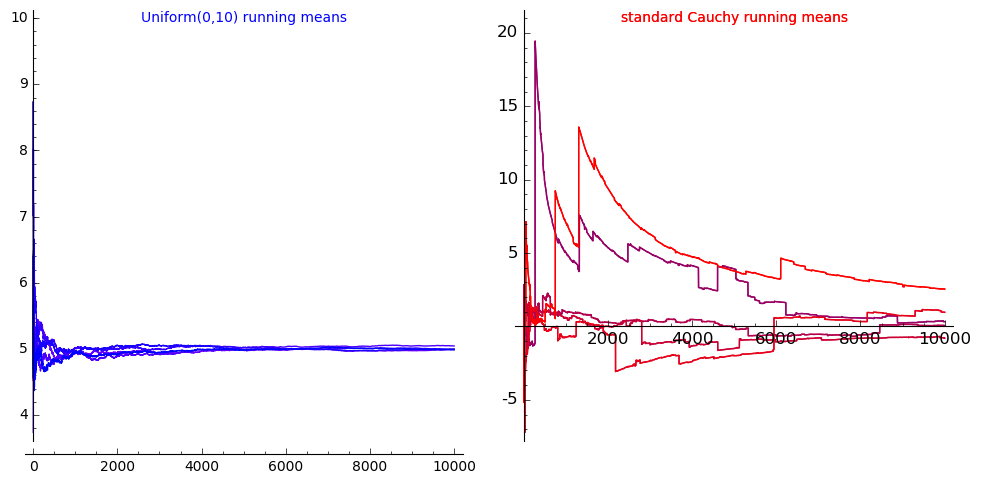

In [3]:
#Plot Samples from uniform and Cauchy distributions and check what happens with the running means
nToGenerate = 10000
theta1, theta2 = 0, 10
iterations = 5
xvalues = range(1, nToGenerate+1,1)
for i in range(iterations):
    shade = 0.5*(iterations - 1 - i)/iterations # to get different colours for the lines
    uRunningMeans = uniformRunningMeans(nToGenerate, theta1, theta2)
    problemStr="" # an empty string
    # use try to catch problems with cauchyRunningMeans functions
    try:
        cRunningMeans = cauchyRunningMeans(nToGenerate)
        ##cRunningMeans = hiddenCauchyRunningMeans(nToGenerate)
        cPts = zip(xvalues, cRunningMeans)
    except NameError, e:
        # cauchyRunningMeans is not defined
        cRunningMeans = [1 for c in range(nToGenerate)] # default value
        problemStr = "No " 
    except Exception, e:
        # some other problem with cauchyRunningMeans
        cRunningMeans = [1 for c in range(nToGenerate)]
        problemStr = "Problem with "      
    uPts = zip(xvalues, uRunningMeans)
    cPts = zip(xvalues, cRunningMeans)
    if (i < 1):
        p1 = line(uPts, rgbcolor = (shade, 0, 1))
        p2 = line(cPts, rgbcolor = (1-shade, 0, shade))
        cauchyTitleMax = max(cRunningMeans) # for placement of cauchy title
    else:
        p1 += line(uPts, rgbcolor = (shade, 0, 1))
        p2 += line(cPts, rgbcolor = (1-shade, 0, shade))
        if max(cRunningMeans) > cauchyTitleMax:
            cauchyTitleMax = max(cRunningMeans)
titleText1 = "Uniform(" + str(theta1) + "," + str(theta2) + ") running means" # make title text
t1 = text(titleText1, (nToGenerate/2,theta2), rgbcolor='blue',fontsize=10) 
titleText2 = problemStr + "standard Cauchy running means" # make title text
t2 = text(titleText2, (nToGenerate/2,ceil(cauchyTitleMax)+1), rgbcolor='red',fontsize=10) 
show(graphics_array((p1+t1,p2+t2)),figsize=[10,5])

# Bus stop simulation

Suppose the inter-arrival times, in minutes, of Orbiter buses at an Orbiter stop follows an $Exponential(\lambda = 0.1)$ distribution.  Also suppose that this is quite a popular bus stop, and the arrival of people is very predictable:  one new person will arrive in each whole minute.  This means that the longer another bus takes in coming, the more people arrive to join the queue.  Also suppose that the number of free seats available on any bus follows a $de\, Moivre(k=40)$ distribution, i.e, there are equally like to to be 1, or 2, or 3 ... or 40 spare seats.   If there are more spare seats than people in the queue, everyone can get onto the bus and  nobody is left waiting, but if there are not enough spare seats some people will be left waiting for the next bus.  As they wait, more people arrive to join the queue....

This is not very realistic - we would want a better model for how many people arrive at the stop at least, and for the number of spare seats there will be on the bus. 


In [6]:
def exponentialFInverse(u, lam):
    '''A function to evaluate the inverse CDF of a exponential distribution.
    
    u is the value to evaluate the inverse CDF at.
    lam is the exponential distribution parameter.'''
    
    # log without a base is the natural logarithm
    return (-1.0/lam)*log(1 - u)
    
def exponentialSample(n, lam):
    '''A function to simulate samples from an exponential distribution.
    
    n is the number of samples to simulate.
    lam is the exponential distribution parameter.'''
    
    us = [random() for i in range(n)]
    
    return [exponentialFInverse(u, lam) for u in us]

def deMoivreFInverse(u, k):
    '''A function to evaluate the inverse CDF of an equi-probable de Moivre.
    
    Param u is the value to evaluate the inverse CDF at.
    Param k is the distribution parameter.
    Returns the inverse CDF for a de Moivre(k) distribution evaluated at u.'''
    
    return floor(k*u) + 1

In [9]:
busTime = exponentialSample(100, 0.1)
waiting = 20
leftWaiting = [waiting]
boardBus = []
for time in busTime:
    waiting += floor(time)
    freeSeats = deMoivreFInverse(random(), 40)
    getonBus = min(waiting, freeSeats)
    boardBus.append(getonBus)
    waiting -= getonBus
    leftWaiting.append(waiting)
print(leftWaiting)
print(boardBus)

[20, 35, 33, 24, 0, 0, 0, 3, 1, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 9, 0, 0, 0, 0, 8, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 20, 13, 2, 4, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 14, 8, 23, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 56, 47, 23, 14, 0, 0, 0, 8]
[4, 10, 13, 31, 9, 5, 21, 6, 3, 3, 7, 19, 20, 19, 0, 1, 0, 8, 20, 0, 0, 12, 19, 9, 0, 0, 20, 3, 8, 11, 2, 22, 4, 1, 19, 4, 4, 1, 3, 2, 11, 10, 11, 17, 15, 12, 5, 1, 9, 5, 13, 5, 7, 2, 4, 1, 5, 11, 1, 11, 26, 27, 1, 9, 0, 2, 2, 2, 4, 6, 2, 3, 20, 8, 3, 1, 2, 2, 11, 2, 0, 5, 5, 2, 3, 2, 13, 8, 0, 1, 14, 0, 10, 16, 34, 15, 28, 9, 3, 6]


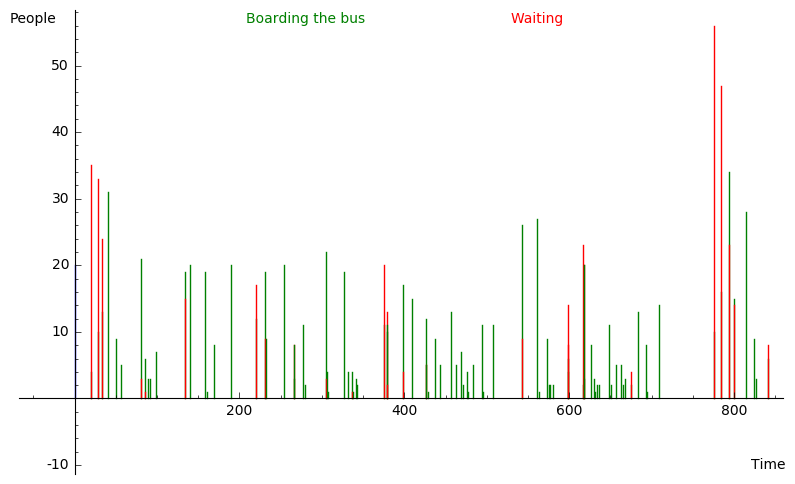

In [10]:
p1 = line([(0.5,0),(0.5,leftWaiting[0])])
csBusTimes=list(cumsum(busTime))
for i in range(1, len(leftWaiting), 1):
    
    p1+= line([(csBusTimes[i-1],0),(csBusTimes[i-1],boardBus[i-1])], rgbcolor='green')
    p1+= line([(csBusTimes[i-1]+.01,0),(csBusTimes[i-1]+.01,leftWaiting[i])], rgbcolor='red')

t1 = text("Boarding the bus", (csBusTimes[len(busTime)-1]/3,max(max(boardBus),max(leftWaiting))+1), rgbcolor='green',fontsize=10) 
t2 = text("Waiting", (csBusTimes[len(busTime)-1]*(2/3),max(max(boardBus),max(leftWaiting))+1), rgbcolor='red',fontsize=10)     
xaxislabel = text("Time", (csBusTimes[len(busTime)-1],-10),fontsize=10,color='black')
yaxislabel = text("People", (-50,max(max(boardBus),max(leftWaiting))+1),fontsize=10,color='black')
show(p1+t1+t2+xaxislabel+yaxislabel,figsize=[8,5])

# A simple Markov chain

Consider the Markov chain describing the mode of transport used by a lazy professor. He has only two modes of transport, namely Walk or Drive. Label Walk by $0$ and Drive by $1$. If he walks today then he will definitely drive tomorrow. But, if he drives today then he flips a fair coin to decide whether he will Walk or Drive tomorrow. His decision to get to work is the same on each day. In the cells below try to:

- Find the flow diagram
- Find and assign the transition probability matrix for this Markov chain
- Find the probability that he will drive on the $n$-th day given he will walk today (day $0$)
- What is the steady state probability vector for this chain?

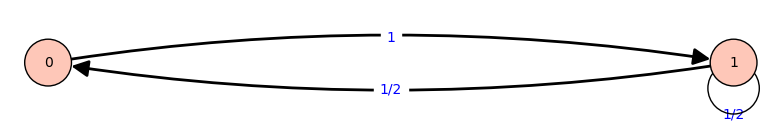

In [11]:
lazyProb = matrix([[0,1],[1/2,1/2]])  # construct and assign the matrix to P
lazyGraph = DiGraph(lazyProb,format="weighted_adjacency_matrix")
pos_dict={}
pos_dict[0] = [1,1]
pos_dict[1] = [3,1]
lazyGraph.plot(edge_labels=True,pos=pos_dict,vertex_size=300).show()

In [12]:
@interact
def driven(n=100):
    init = vector((1,0))
    nProb = init*lazyProb^n
    return RR(nProb[1])

Interactive function <function driven at 0x6fef0c71d70> with 1 widget
  n: IntSlider(value=100, description=u'n', max=300, min=-100)